Import packages

In [536]:
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd

Visualization Packages

In [537]:
import matplotlib.pyplot as plt
import seaborn as sb

SKLearn packages

In [538]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, MaxAbsScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from joblib import Memory
from shutil import rmtree

Load the data

In [539]:
df = pd.read_csv('data/training.csv')
df.dropna(inplace=True)
df.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_8328\705503941.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/training.csv')


,id,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1,pln,0.0,3886,4181,Phaseolus coccineus,0.02392,0.02966,0.00765,0.01794,...,0.00167,0.00789,0.01315,0.02966,0.02631,0.02822,0.02727,0.00096,0.00191,0.00144
1,2,arc,0.0,146920,1716,Acidianus tengchongenses,0.01748,0.01049,0.05361,0.01282,...,0.00000,0.03322,0.00524,0.04429,0.01340,0.05769,0.02214,0.00233,0.00000,0.00000
2,3,vrl,0.0,220938,1103,Tomato yellow leaf curl virus-[Almeria],0.02357,0.02267,0.01632,0.01088,...,0.00363,0.01995,0.01632,0.03083,0.01813,0.02992,0.01904,0.00363,0.00091,0.00091
3,4,pln,1.0,35128,9379,mitochondrion Thalassiosira pseudonana,0.0708,0.01397,0.07389,0.01685,...,0.00235,0.01386,0.00213,0.02143,0.00618,0.02506,0.00533,0.00341,0.00032,0.00661
4,5,rod,1.0,9995,1520,mitochondrion Marmota monax,0.04671,0.02632,0.03421,0.00000,...,0.00197,0.00263,0.00000,0.01053,0.01842,0.01382,0.00197,0.00000,0.00000,0.02895


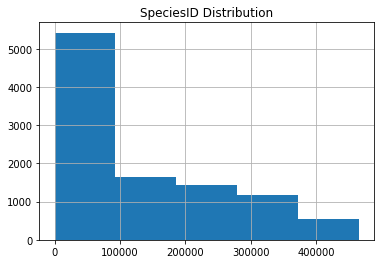

In [620]:
df.SpeciesID.hist(bins=5)
plt.title('SpeciesID Distribution')
plt.show()

In [540]:
df = df[df['UUC']!='-']
df = df[df['UUU']!='non-B hepatitis virus']

In [541]:
df['SpeciesName'] = df['SpeciesName'].str.lower()
df['mitochondrian'] = [int('mitochondrion' in i) for i in df['SpeciesName']]
df['virus'] = [int('virus' in i) for i in df['SpeciesName']]
df['chloroplast'] = [int('chloroplast' in i) for i in df['SpeciesName']]
df['baccilus'] = [int('bacillus' in i) for i in df['SpeciesName']]
df['bacterium'] = [int('bacterium' in i) for i in df['SpeciesName']]
df['bacteria'] = [int('bacteria' in i) for i in df['SpeciesName']]
df['streptomyces'] = [int('streptomyces' in i) for i in df['SpeciesName']]

In [542]:
X = df.drop(columns = ['Kingdom'])
y = df['Kingdom']

In [543]:
y.value_counts()

bct    2297
vrl    2236
pln    1959
vrt    1636
inv    1064
mam     425
phg     172
rod     171
pri     143
arc      99
plm      13
Name: Kingdom, dtype: int64

In [544]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)
y.value_counts()

1     2297
9     2236
6     1959
10    1636
2     1064
3      425
4      172
8      171
7      143
0       99
5       13
dtype: int64

We have a total of 11 categories

Let's now remove unnecessary colummns

In [545]:
X.drop(columns = ['SpeciesName', 'id'], inplace = True)

In [546]:

X['UUU']=X['UUU'].astype('float')
X['UUC']=X['UUC'].astype('float')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10215 entries, 0 to 10217
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DNAtype        10215 non-null  float64
 1   SpeciesID      10215 non-null  int64  
 2   Ncodons        10215 non-null  int64  
 3   UUU            10215 non-null  float64
 4   UUC            10215 non-null  float64
 5   UUA            10215 non-null  float64
 6   UUG            10215 non-null  float64
 7   CUU            10215 non-null  float64
 8   CUC            10215 non-null  float64
 9   CUA            10215 non-null  float64
 10  CUG            10215 non-null  float64
 11  AUU            10215 non-null  float64
 12  AUC            10215 non-null  float64
 13  AUA            10215 non-null  float64
 14  AUG            10215 non-null  float64
 15  GUU            10215 non-null  float64
 16  GUC            10215 non-null  float64
 17  GUA            10215 non-null  float64
 18  GUG   

In [547]:
X.isna().sum()

DNAtype         0
SpeciesID       0
Ncodons         0
UUU             0
UUC             0
               ..
chloroplast     0
baccilus        0
bacterium       0
bacteria        0
streptomyces    0
Length: 74, dtype: int64

<AxesSubplot:>

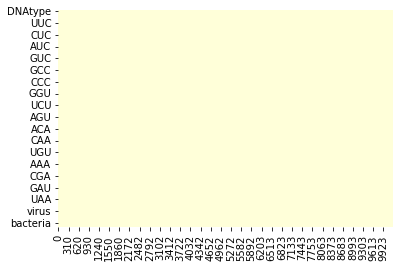

In [548]:
sb.heatmap(X.isna().transpose(), cbar = False, cmap = 'YlGnBu')

Don't see any missing values from this chart. Looks like it's the only 1 in DNA Type

In [549]:
X[X['DNAtype'].isna()]

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,UAA,UAG,UGA,mitochondrian,virus,chloroplast,baccilus,bacterium,bacteria,streptomyces


Since the missing DNA type is of kingdom mam and we have sufficient entries of mam (426), we can afford to lose one data point

In [550]:
X.dropna(inplace = True)

Let's Scale the DNA column

In [551]:
X['Ncodons'] = [(i - X['Ncodons'].min())/(X['Ncodons'].max() - X['Ncodons'].min()) for i in X['Ncodons']]

Train Validation split

In [552]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.3, random_state = 20221104, stratify = y)

Building a Neural Network

In [553]:
y_train = np.array(y_train[0].to_list())

In [554]:
y_val = np.array(y_val[0].to_list())

In [555]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-0.52521388, -0.97790982, -0.06207877, ..., -0.1397682 ,
        -0.10365118, -0.11479723],
       [ 0.8403422 ,  1.61348213, -0.10207325, ..., -0.1397682 ,
        -0.10365118, -0.11479723],
       [-0.52521388, -0.38227254, -0.10253722, ..., -0.1397682 ,
        -0.10365118, -0.11479723],
       ...,
       [ 2.20589828,  2.4231161 , -0.0723795 , ..., -0.1397682 ,
        -0.10365118, -0.11479723],
       [-0.52521388, -0.61433166, -0.09561132, ..., -0.1397682 ,
        -0.10365118, -0.11479723],
       [ 2.20589828, -0.64380278, -0.10250725, ..., -0.1397682 ,
        -0.10365118, -0.11479723]])

In [556]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)
X_val

array([[ 4.66672645,  0.29768429, -0.11383398, ..., -0.14368723,
        -0.11928532, -0.1287779 ],
       [-0.48676538, -0.98645852, -0.11330277, ..., -0.14368723,
        -0.11928532, -0.1287779 ],
       [-0.48676538, -0.94889902, -0.11230442, ..., -0.14368723,
        -0.11928532, -0.1287779 ],
       ...,
       [-0.48676538, -1.01941379, -0.09404369, ..., -0.14368723,
        -0.11928532, -0.1287779 ],
       [-0.48676538, -0.75729561, -0.11198398, ..., -0.14368723,
        -0.11928532, -0.1287779 ],
       [ 0.80160758, -0.48962172, -0.11425269, ..., -0.14368723,
        -0.11928532, -0.1287779 ]])

In [557]:
X_train.shape
y_train.shape

(7150,)

In [614]:
from sklearn.neural_network import MLPClassifier
num_neurons = 200
num_iters = 100

mlp1 = MLPClassifier(max_iter = num_iters, hidden_layer_sizes = [num_neurons,num_neurons,num_neurons,num_neurons,num_neurons], activation='relu',random_state = 123, verbose = True)
mlp1.fit(X_train, y_train)

print("Activation Function: {}".format(mlp1.activation))
print("List of predicted classes: {}".format(mlp1.classes_))

Iteration 1, loss = 0.99070363
Iteration 2, loss = 0.33417528
Iteration 3, loss = 0.24332913
Iteration 4, loss = 0.18599847
Iteration 5, loss = 0.14294473
Iteration 6, loss = 0.12317914
Iteration 7, loss = 0.10142357
Iteration 8, loss = 0.09135079
Iteration 9, loss = 0.09256742
Iteration 10, loss = 0.07683993
Iteration 11, loss = 0.06887517
Iteration 12, loss = 0.05068629
Iteration 13, loss = 0.04879462
Iteration 14, loss = 0.05042307
Iteration 15, loss = 0.04195014
Iteration 16, loss = 0.02647489
Iteration 17, loss = 0.02148657
Iteration 18, loss = 0.02159007
Iteration 19, loss = 0.02093002
Iteration 20, loss = 0.02089933
Iteration 21, loss = 0.01933120
Iteration 22, loss = 0.01962685
Iteration 23, loss = 0.01933191
Iteration 24, loss = 0.01651412
Iteration 25, loss = 0.01198230
Iteration 26, loss = 0.02197715
Iteration 27, loss = 0.03126447
Iteration 28, loss = 0.02231075
Iteration 29, loss = 0.02143803
Iteration 30, loss = 0.03383490
Iteration 31, loss = 0.01271960
Iteration 32, los

In [601]:
print(mlp1.coefs_)

[array([[ 0.04808235, -0.02324637, -0.10333545, ...,  0.07220596,
        -0.07861533, -0.12883039],
       [ 0.06686279, -0.18258788,  0.00600391, ...,  0.05742258,
        -0.083089  ,  0.10657701],
       [ 0.00187652, -0.07889136,  0.10515186, ...,  0.0052687 ,
        -0.11797856, -0.20156412],
       ...,
       [ 0.12087877,  0.04569125,  0.08352319, ...,  0.00523338,
         0.10467171,  0.01326618],
       [ 0.05546871,  0.1502412 , -0.05013383, ...,  0.09588717,
         0.04670397, -0.08500296],
       [-0.03273044,  0.12029142, -0.08033365, ...,  0.04689183,
         0.06060491,  0.03052471]]), array([[ 0.04902397,  0.02634139, -0.01735667, ...,  0.1164432 ,
        -0.13034866, -0.03406614],
       [ 0.23817218, -0.06216499, -0.05482119, ..., -0.14109845,
         0.05374641,  0.03524851],
       [-0.15223076, -0.04088516,  0.01081532, ..., -0.05998159,
        -0.09504516, -0.01591105],
       ...,
       [ 0.0173197 ,  0.05548389,  0.02516529, ..., -0.04902033,
        

In [615]:
from sklearn import metrics
y_predicted = mlp1.predict(X_val)
print(metrics.classification_report(y_val, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.97      0.98      0.97       689
           2       0.89      0.88      0.89       319
           3       0.84      0.90      0.87       127
           4       0.94      0.85      0.89        52
           5       0.50      0.25      0.33         4
           6       0.93      0.95      0.94       588
           7       0.73      0.84      0.78        43
           8       0.86      0.63      0.73        51
           9       1.00      0.99      1.00       671
          10       0.97      0.97      0.97       491

    accuracy                           0.95      3065
   macro avg       0.86      0.82      0.83      3065
weighted avg       0.95      0.95      0.95      3065



In [585]:
y_predicted
y_val

array([10, 10,  6, ...,  6,  1,  6])

In [589]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_predicted)
print(cf_matrix)

[[ 23   6   0   0   0   0   0   0   0   1   0]
 [  3 673   2   0   2   1   7   0   0   0   1]
 [  0   2 282   0   1   0  30   0   0   1   3]
 [  0   0   3 114   0   0   0   6   1   0   3]
 [  2   5   1   0  44   0   0   0   0   0   0]
 [  0   3   0   0   0   1   0   0   0   0   0]
 [  0   4  22   0   0   0 556   0   2   0   4]
 [  0   0   0   5   0   0   0  36   1   0   1]
 [  0   0   0  11   0   0   1   4  32   0   3]
 [  0   1   0   1   0   0   2   0   0 667   0]
 [  0   0   7   5   0   0   1   3   1   0 474]]


<AxesSubplot:>

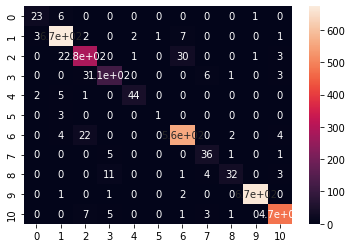

In [590]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [591]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]], dtype=int64)

In [513]:
y_predicted_val = le.inverse_transform(y_predicted)
y_predicted_val

array(['vrt', 'phg', 'vrl', ..., 'pln', 'pln', 'vrt'], dtype=object)

In [514]:
df_test = pd.read_csv('data/testing.csv')
df_test.dropna(inplace=True)
df_test.head()

,id,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,10129,0,380134,3307,Fusarium oxysporum f. sp. colocasiae,0.00907,0.03145,0.00121,0.01270,0.01391,...,0.00000,0.00423,0.00121,0.02873,0.03538,0.00544,0.01875,0.00121,0.00121,0.00000
1,10130,0,235457,1357,Adeno-associated virus 11,0.01695,0.02800,0.00368,0.00590,0.00368,...,0.00663,0.01400,0.00442,0.01179,0.04348,0.01548,0.04274,0.00147,0.00000,0.00000
2,10131,2,34301,26766,chloroplast Nymphaea alba,0.03172,0.02272,0.02798,0.02167,0.02062,...,0.00497,0.01939,0.00770,0.03262,0.00897,0.03852,0.01487,0.00164,0.00090,0.00097
3,10132,0,5530,30838,Metarhizium anisopliae,0.01235,0.02299,0.00311,0.01362,0.01443,...,0.00519,0.00538,0.00451,0.02396,0.03502,0.01647,0.03424,0.00104,0.00062,0.00032
4,10133,1,398797,2402,mitochondrion Rhagophthalmus lufengensis,0.09159,0.01166,0.10991,0.00833,0.01499,...,0.00083,0.02748,0.00000,0.01249,0.00083,0.01873,0.00250,0.00291,0.00125,0.02581


In [515]:
df_test['SpeciesName'] = df_test['SpeciesName'].str.lower()
df_test['mitochondrian'] = [int('mitochondrion' in i) for i in df_test['SpeciesName']]
df_test['virus'] = [int('virus' in i) for i in df_test['SpeciesName']]
df_test['chloroplast'] = [int('chloroplast' in i) for i in df_test['SpeciesName']]
df_test['baccilus'] = [int('bacillus' in i) for i in df_test['SpeciesName']]
df_test['bacterium'] = [int('bacterium' in i) for i in df_test['SpeciesName']]
df_test['bacteria'] = [int('bacteria' in i) for i in df_test['SpeciesName']]
df_test['streptomyces'] = [int('streptomyces' in i) for i in df_test['SpeciesName']]

In [516]:
df_test.drop(columns = ['SpeciesName', 'id'], inplace = True)

In [517]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DNAtype        2810 non-null   int64  
 1   SpeciesID      2810 non-null   int64  
 2   Ncodons        2810 non-null   int64  
 3   UUU            2810 non-null   float64
 4   UUC            2810 non-null   float64
 5   UUA            2810 non-null   float64
 6   UUG            2810 non-null   float64
 7   CUU            2810 non-null   float64
 8   CUC            2810 non-null   float64
 9   CUA            2810 non-null   float64
 10  CUG            2810 non-null   float64
 11  AUU            2810 non-null   float64
 12  AUC            2810 non-null   float64
 13  AUA            2810 non-null   float64
 14  AUG            2810 non-null   float64
 15  GUU            2810 non-null   float64
 16  GUC            2810 non-null   float64
 17  GUA            2810 non-null   float64
 18  GUG     

In [518]:
df_test['Ncodons'] = [(i - df_test['Ncodons'].min())/(df_test['Ncodons'].max() - df_test['Ncodons'].min()) for i in df_test['Ncodons']]

In [519]:
sc = StandardScaler()
df_test = sc.fit_transform(df_test)
df_test

array([[-0.52986627,  2.00425389, -0.1869592 , ..., -0.13459548,
        -0.10901068, -0.12466072],
       [-0.52986627,  0.83886169, -0.19336462, ..., -0.13459548,
        -0.10901068, -0.12466072],
       [ 2.03282603, -0.78147626, -0.10990032, ..., -0.13459548,
        -0.10901068, -0.12466072],
       ...,
       [-0.52986627,  1.33660435, -0.1941924 , ..., -0.13459548,
        -0.10901068, -0.12466072],
       [-0.52986627, -0.46875996, -0.19238903, ..., -0.13459548,
        -0.10901068, -0.12466072],
       [-0.52986627, -1.05150037, -0.05741855, ..., -0.13459548,
        -0.10901068, -0.12466072]])

In [520]:
df_test.shape

(2810, 74)

In [521]:
y_test_predicted = mlp1.predict(df_test)
# print(metrics.classification_report(y_test, y_test_predicted))
y_test_predicted

array([6, 9, 6, ..., 9, 6, 1])

In [522]:
y_predicted_test = le.inverse_transform(y_test_predicted)
y_predicted_test

array(['pln', 'vrl', 'pln', ..., 'vrl', 'pln', 'bct'], dtype=object)

In [523]:
df_test_submit = pd.read_csv('data/testing.csv')


In [524]:
df_test_submit['Kingdom'] = y_predicted_test.tolist()

In [525]:
df_test_submit[['id','Kingdom']]

,id,Kingdom
0,10129,pln
1,10130,vrl
2,10131,pln
3,10132,pln
4,10133,inv
...,...,...
2805,12934,bct
2806,12935,vrt
2807,12936,vrl
2808,12937,pln


In [526]:
df_test_submit[['id','Kingdom']].to_csv('final_result_1.csv', index=False)

In [478]:
X_train.shape

(7150, 74)

In [479]:
import torch
import torch.nn as nn

In [480]:
class MultiLayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super(MultiLayerPerceptron, self).__init__()

    # Save the initialization parameters
    self.input_size = input_size
    self.hidden_size = hidden_size

    # Defining our layers
    self.linear = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.input_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    linear = self.linear(x)
    relu = self.relu(linear)
    linear2 = self.linear2(relu)
    output = self.sigmoid(linear2)
    return output

In [481]:
import tensorflow as tf
X_train = torch.from_numpy(X_train) 
y_train = torch.from_numpy(y_train)

In [483]:
# Instantiate the model
model = MultiLayerPerceptron(74, 3)

# Define loss function
loss_func = nn.BCELoss()

# Calculate how our model is doing now
y_pred = model(X_train)
print(loss_func(y_pred, y_train).item())
print(y_pred)

RuntimeError: mat1 and mat2 must have the same dtype

In [ ]:
list(model.named_parameters())

In [581]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20221104)
# scorer = sk.metrics.make_scorer(sk.metrics.f1_score , average = 'weighted')
scores = cross_validate(mlp1, X_train, y_train, cv=skf, scoring='accuracy' )

Iteration 1, loss = 1.13136213
Iteration 2, loss = 0.41866377
Iteration 3, loss = 0.27245179
Iteration 4, loss = 0.20751252
Iteration 5, loss = 0.16934733
Iteration 6, loss = 0.12683356
Iteration 7, loss = 0.10796444
Iteration 8, loss = 0.08769921
Iteration 9, loss = 0.07941359
Iteration 10, loss = 0.07785997
Iteration 11, loss = 0.05708875
Iteration 12, loss = 0.05146500
Iteration 13, loss = 0.05296982
Iteration 14, loss = 0.04197270
Iteration 15, loss = 0.02992605
Iteration 16, loss = 0.03835967
Iteration 17, loss = 0.02840810
Iteration 18, loss = 0.01766216
Iteration 19, loss = 0.01416638
Iteration 20, loss = 0.02124460
Iteration 21, loss = 0.03190797
Iteration 22, loss = 0.05878372
Iteration 23, loss = 0.03820091
Iteration 24, loss = 0.01938350
Iteration 25, loss = 0.01355573
Iteration 26, loss = 0.00849701
Iteration 27, loss = 0.00885058
Iteration 28, loss = 0.00318122
Iteration 29, loss = 0.00288343
Iteration 30, loss = 0.00506525
Iteration 31, loss = 0.00924502
Iteration 32, los

<AxesSubplot:>

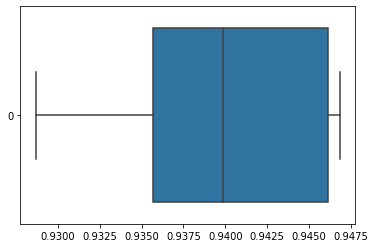

In [604]:
sb.boxplot(score_df['test_score'], orient='h')

In [582]:
score_df = pd.DataFrame(scores)
score_df

,fit_time,score_time,test_score
0,8.307616,0.014003,0.928671
1,10.080071,0.013001,0.946853
2,10.243653,0.010002,0.935664
3,10.701349,0.014001,0.946154
4,11.461009,0.012000,0.939860


In [423]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import random

random.seed(7)

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(40, activation='relu', kernel_initializer='random_normal', input_dim=66))
#Second  Hidden Layer
classifier.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(11, activation='tanh', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
'''
start_time = time.time()

trained_model_7 = model.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data = (X_test, y_test))

end_time = time.time()

num_mins = (end_time-start_time)/60

print("Total training time for the Seventh model is: "  + str(num_mins) + " minutes.")
'''

'\nstart_time = time.time()\n\ntrained_model_7 = model.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data = (X_test, y_test))\n\nend_time = time.time()\n\nnum_mins = (end_time-start_time)/60\n\nprint("Total training time for the Seventh model is: "  + str(num_mins) + " minutes.")\n'

In [424]:
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\shash\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 66), found shape=(10, 74)


In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
# import shap

n_features = 66
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    # layer output
    layers.Dense(name="output", units=11, activation='relu')
])
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, batch_size=1, epochs=10)